In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
raw_data = pd.read_csv('uci-secom.csv')

In [4]:
len(raw_data)

1567

In [5]:
raw_data.columns

Index(['Time', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '581', '582', '583', '584', '585', '586', '587', '588', '589',
       'Pass/Fail'],
      dtype='object', length=592)

In [6]:
raw_data['Pass/Fail'].value_counts()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

In [7]:
null = []
Not_null = []
null = raw_data.isnull().sum()

In [8]:
for i in null.index:
    if null[i] == 0:
        Not_null.append(i)

In [9]:
null = null.drop(Not_null)

In [10]:
null_20 = []
for i in null.index:
    if null[i] < 20:
        null_20.append(i)
null = null.drop(null_20)

In [11]:
raw_data.columns

Index(['Time', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '581', '582', '583', '584', '585', '586', '587', '588', '589',
       'Pass/Fail'],
      dtype='object', length=592)

In [12]:
len(null)

103

In [13]:
len(null_20)

435

In [14]:
len(null_20)+len(null)

538

In [15]:
data = raw_data.copy()

In [16]:
data = data.drop(null.index,axis=1)

In [17]:
data.head()

,Time,0,1,2,3,4,5,6,7,8,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,14.9509,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [18]:
data = data.drop('Time', axis=1)

In [19]:
data.replace(np.nan, data.median(), inplace=True)

In [20]:
data.isnull().any().any()

False

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 488 entries, 0 to Pass/Fail
dtypes: float64(487), int64(1)
memory usage: 5.8 MB


In [23]:
unique_columns = []
for i in data.columns:
    tmp =  data[i].unique() # data[i].unique()
    if len(tmp) == 1:
        unique_columns.append(i)

In [24]:
len(unique_columns)

111

In [25]:
data = data.drop(unique_columns, axis=1)

In [26]:
data.head(5)

,0,1,2,3,4,6,7,8,9,10,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,...,14.9509,0.5005,0.0118,0.0035,2.3630,0.0205,0.0148,0.0046,71.9005,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [31]:
X = data.loc[:,'0':'589']
y = data.loc[:,'Pass/Fail']

In [57]:
data.to_csv('data_before_feature_selection.csv')

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 377 entries, 0 to Pass/Fail
dtypes: float64(376), int64(1)
memory usage: 4.5 MB


In [32]:
X

,0,1,2,3,4,6,7,8,9,10,...,576,577,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,...,1.6765,14.9509,0.5005,0.0118,0.0035,2.3630,0.0205,0.0148,0.0046,71.9005
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,1.1065,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,...,2.0952,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,...,1.7585,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,1.6597,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
5,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5287,0.0167,0.0055,...,1.6679,13.7755,0.4949,0.0189,0.0044,3.8276,0.0342,0.0151,0.0052,44.0077
6,3030.27,2430.12,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.5816,-0.0270,0.0105,...,1.1958,8.3645,0.5010,0.0143,0.0042,2.8515,0.0342,0.0151,0.0052,44.0077
7,3058.88,2690.15,2248.9000,1004.4692,0.7884,106.2400,0.1185,1.5153,0.0157,0.0007,...,56.4274,16.0862,0.4984,0.0106,0.0034,2.1261,0.0204,0.0194,0.0063,95.0310
8,2967.68,2600.47,2248.9000,1004.4692,0.7884,106.2400,0.1185,1.5358,0.0111,-0.0066,...,1.3248,14.2892,0.4993,0.0172,0.0046,3.4456,0.0111,0.0124,0.0045,111.6525
9,3016.11,2428.37,2248.9000,1004.4692,0.7884,106.2400,0.1185,1.5381,0.0159,0.0049,...,0.6636,7.4181,0.4967,0.0152,0.0038,3.0687,0.0212,0.0191,0.0073,90.2294


In [27]:
# data

In [28]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [29]:
minmaxscaler = MinMaxScaler()

In [33]:
X = minmaxscaler.fit_transform(X)

In [34]:
X = pd.DataFrame(X)

In [35]:
feature_name = list(pd.DataFrame(X).columns)
# no of maximum features we need to select
num_feats= 55

In [36]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=num_feats)
embeded_lgb_selector.fit(X, y)

SelectFromModel(estimator=LGBMClassifier(colsample_bytree=0.2,
                                         learning_rate=0.05,
                                         min_child_weight=40,
                                         min_split_gain=0.01, n_estimators=500,
                                         num_leaves=32, reg_alpha=3,
                                         reg_lambda=1),
                max_features=55)

In [37]:
embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

55 selected features


In [38]:
df_lgb = pd.DataFrame(X, columns=embeded_lgb_feature)
X_lgb = df_lgb.copy() 

In [40]:
X_lgb.head()

,0,19,20,25,31,40,43,52,58,61,...,301,318,321,329,341,356,365,367,368,373
0,0.469231,0.242124,0.797675,0.398104,0.121293,0.319010,0.411986,0.138291,0.221741,0.762021,...,0.043740,0.155453,0.041580,0.014323,0.000000,0.229765,0.150986,0.112244,0.709375,0.151239
1,0.575003,0.238978,0.712274,0.964903,0.139530,0.360565,0.535243,0.151144,0.204983,0.833427,...,0.036447,0.229751,0.039419,0.014288,0.000000,0.115285,0.102807,0.068396,0.753125,0.220339
2,0.308868,0.238104,0.738940,0.989554,0.067069,0.340259,0.408149,0.267903,0.175564,0.727359,...,0.088241,0.172564,0.037459,0.025803,0.244275,0.983876,0.077769,0.050771,0.562500,0.589309
3,0.400385,0.235237,0.724308,0.955045,0.068333,0.340259,0.447084,0.270716,0.168451,0.750309,...,0.042575,0.139495,0.052237,0.016615,0.000000,0.434376,0.055956,0.043312,0.662500,0.152542
4,0.471367,0.234118,0.720752,0.949862,0.073974,1.000000,0.328147,0.084682,0.350179,0.738046,...,0.036276,0.162191,0.024435,0.015655,0.000000,0.138504,0.090288,0.069148,0.068750,0.152542


In [49]:
embeded_lgb_feature

[0,
 19,
 20,
 25,
 31,
 40,
 43,
 52,
 58,
 61,
 67,
 80,
 81,
 93,
 95,
 97,
 100,
 102,
 110,
 129,
 132,
 144,
 147,
 151,
 155,
 160,
 178,
 199,
 204,
 213,
 214,
 216,
 217,
 222,
 224,
 227,
 228,
 231,
 234,
 238,
 241,
 243,
 246,
 277,
 293,
 301,
 318,
 321,
 329,
 341,
 356,
 365,
 367,
 368,
 373]

In [50]:
data_final.to_csv('data_final.csv', index=True)

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler

random_state = []

for j in range(1,101): 
    random_state.append(j)
ai = []
for rand in random_state:
  X_train,X_test,y_train,y_test=train_test_split(X_lgb,y,test_size=0.2,random_state= rand,stratify=y)
  log_reg = LogisticRegression(random_state=13,solver='liblinear',C=10.0)
  log_reg.fit(X_train, y_train)
  pred_proba_1 = log_reg.predict_proba(X_test)[:,1]
  auc_test = roc_auc_score(y_test, pred_proba_1)
  print('random_state=', rand,'  ' ,'auc_test =', auc_test)
  print('')
  ai.append(auc_test)
print("평균 = ", np.mean(ai))

random_state= 1    auc_test = 0.7802697870957256

random_state= 2    auc_test = 0.7872582480091013

random_state= 3    auc_test = 0.7258248009101251

random_state= 4    auc_test = 0.7617422395579392

random_state= 5    auc_test = 0.6697545912562977

random_state= 6    auc_test = 0.758654314968308

random_state= 7    auc_test = 0.7687307004713149

random_state= 8    auc_test = 0.7290752478465788

random_state= 9    auc_test = 0.7159109377539411

random_state= 10    auc_test = 0.7146107589793597

random_state= 11    auc_test = 0.7646676418007476

random_state= 12    auc_test = 0.7641800747602795

random_state= 13    auc_test = 0.7729562814887047

random_state= 14    auc_test = 0.7651552088412157

random_state= 15    auc_test = 0.7778319518933854

random_state= 16    auc_test = 0.7497155858930603

random_state= 17    auc_test = 0.7188363399967495

random_state= 18    auc_test = 0.8158621810498943

random_state= 19    auc_test = 0.7357386640663091

random_state= 20    auc_test = 0.77311880

In [69]:
# 여기서 만약 .predict()를 사용하면 새로운 속성들을 넣었을 때 그 레이블에 속하는지 아닌지 1또는 0으로 구성된 벡터를 반환해준다.
# 그리고 만약 분류 결과가 아니라, 해당 레이블로 분류될 확률 값을 알고 싶다면 이렇게 .predict_proba()를 사용해주면 된다. 당연히 각 샘플에 대한 확률을 0에서 1사이의 값으로 돌려줄 거다.

In [71]:
np.mean(ai)

0.7552917276125467

In [52]:
data_final

,0,19,20,25,31,40,43,52,58,61,...,318,321,329,341,356,365,367,368,373,Pass/Fail
0,0.469231,0.242124,0.797675,0.398104,0.121293,0.319010,0.411986,0.138291,0.221741,0.762021,...,0.155453,0.041580,0.014323,0.000000,0.229765,0.150986,0.112244,0.709375,0.151239,-1
1,0.575003,0.238978,0.712274,0.964903,0.139530,0.360565,0.535243,0.151144,0.204983,0.833427,...,0.229751,0.039419,0.014288,0.000000,0.115285,0.102807,0.068396,0.753125,0.220339,-1
2,0.308868,0.238104,0.738940,0.989554,0.067069,0.340259,0.408149,0.267903,0.175564,0.727359,...,0.172564,0.037459,0.025803,0.244275,0.983876,0.077769,0.050771,0.562500,0.589309,1
3,0.400385,0.235237,0.724308,0.955045,0.068333,0.340259,0.447084,0.270716,0.168451,0.750309,...,0.139495,0.052237,0.016615,0.000000,0.434376,0.055956,0.043312,0.662500,0.152542,-1
4,0.471367,0.234118,0.720752,0.949862,0.073974,1.000000,0.328147,0.084682,0.350179,0.738046,...,0.162191,0.024435,0.015655,0.000000,0.138504,0.090288,0.069148,0.068750,0.152542,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,0.254718,0.242159,0.713299,0.924335,0.070715,0.293569,0.327079,0.161344,0.159611,0.744819,...,0.316235,0.040128,0.009539,0.235790,0.331022,0.105273,0.077330,0.656250,0.138201,-1
1563,0.504102,0.103703,0.622906,0.672625,0.086234,0.625852,0.189741,0.130027,0.238142,0.714656,...,0.074854,0.038551,0.017014,0.700000,0.121251,0.186457,0.143496,0.615625,0.138201,-1
1564,0.384221,0.279291,0.740376,0.944208,0.036183,0.385587,0.456138,0.152965,0.189723,0.814223,...,0.210711,0.048361,0.006249,0.000000,0.128829,0.212822,0.142292,0.653125,0.070404,-1
1565,0.247394,0.262718,0.732034,0.956481,0.100990,0.275190,0.430361,0.169714,0.141632,0.808924,...,0.150810,0.040096,0.020835,0.456410,0.191712,0.153642,0.158354,0.706250,0.277705,-1


# 상관관계 히트맵 

In [41]:
data1 = pd.read_csv('semiconductor_hsy.csv')

In [42]:
data1.drop('Unnamed: 0', axis=1)

,0,1,2,3,5,6,7,8,9,10,...,561,570,571,577,582,585,586,587,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,100,97.6133,0.1242,1.5005,0.0162,-0.0034,...,42.3877,533.8500,2.1113,14.9509,0.5005,2.3630,0.0205,0.0148,71.9005,-1
1,3095.78,2465.14,2230.4222,1463.6606,100,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,18.1087,535.0164,2.4335,10.9003,0.5019,4.4447,0.0096,0.0201,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,100,95.4878,0.1241,1.4436,0.0041,0.0013,...,24.7524,535.0245,2.0293,9.2721,0.4958,3.1745,0.0584,0.0484,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,100,104.2367,0.1217,1.4882,-0.0124,-0.0033,...,62.7572,530.5682,2.0253,8.5831,0.4990,2.0544,0.0202,0.0149,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,100,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,22.0500,532.0155,2.0275,10.9698,0.4800,99.3032,0.0202,0.0149,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,100,82.2467,0.1248,1.3424,-0.0045,-0.0057,...,32.3812,536.3418,2.0153,11.7256,0.4988,2.8669,0.0068,0.0138,203.1720,-1
1563,3052.31,2522.55,2198.5667,1124.6595,100,98.4689,0.1205,1.4333,-0.0061,-0.0093,...,32.1048,537.9264,2.1814,17.8379,0.4975,2.6238,0.0068,0.0138,203.1720,-1
1564,2978.81,2379.78,2206.3000,1110.4967,100,99.4122,0.1208,1.4616,-0.0013,0.0004,...,13.0316,530.3709,2.3435,17.7267,0.4987,3.0590,0.0197,0.0086,43.5231,-1
1565,2894.92,2532.01,2177.0333,1183.7287,100,98.7978,0.1213,1.4622,-0.0072,0.0032,...,18.9966,534.3936,1.9098,19.2104,0.5004,3.5662,0.0262,0.0245,93.4941,-1


In [73]:
data = data.drop('Time',axis=1)

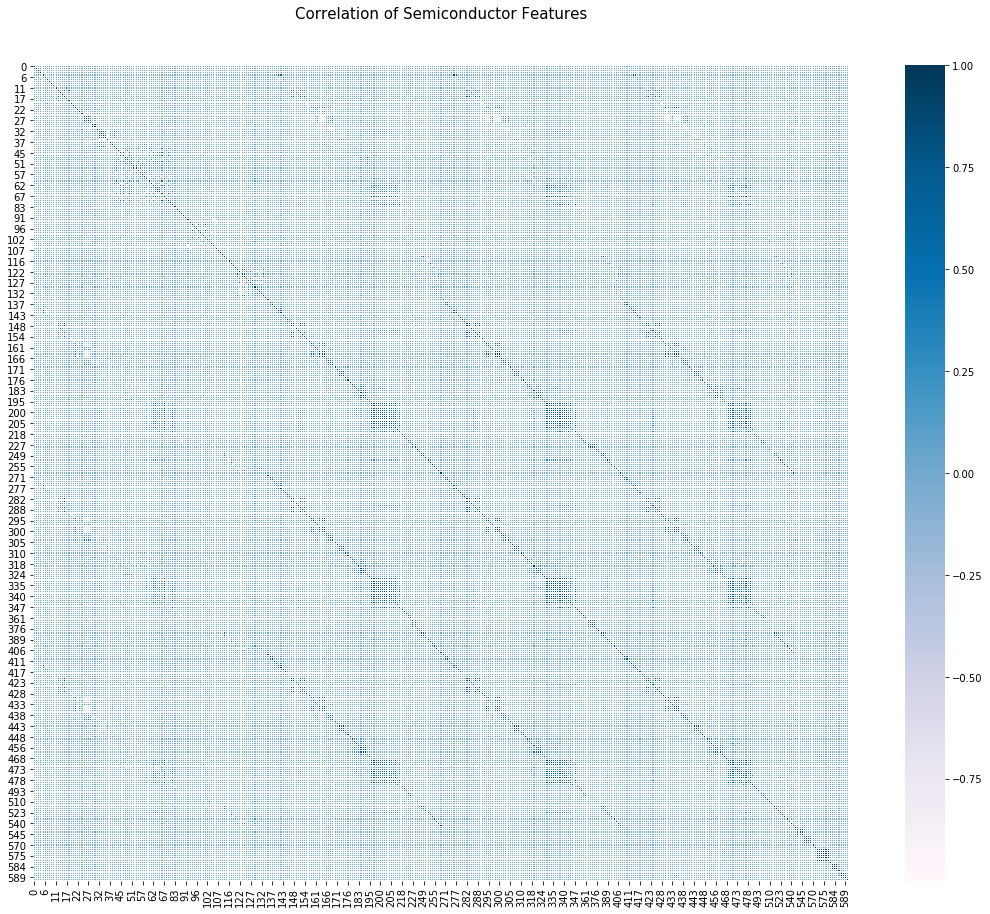

In [74]:
colormap = plt.cm.PuBu 
plt.figure(figsize=(20, 15)) 
plt.title("Correlation of Semiconductor Features", y = 1.05, size = 15)
sns.heatmap(data.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = "white", annot = False)

In [76]:
data1 = data1.drop('Unnamed: 0', axis=1)

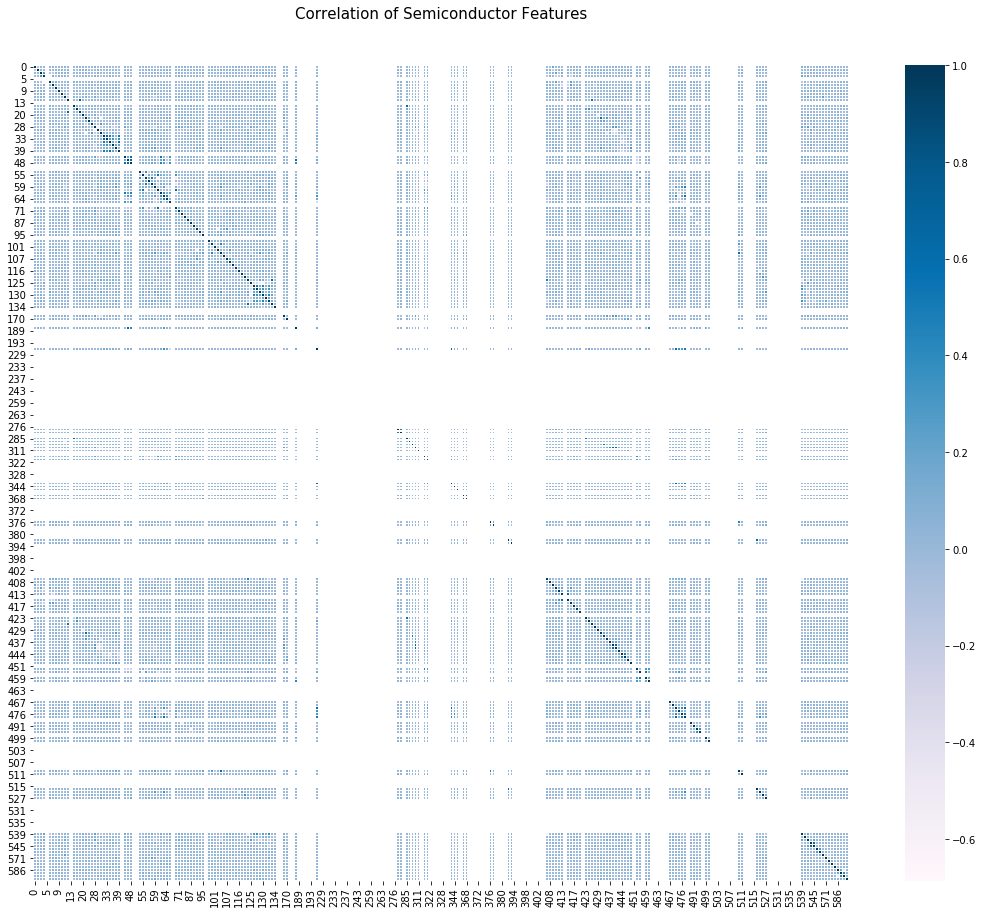

In [77]:
colormap = plt.cm.PuBu 
plt.figure(figsize=(20, 15)) 
plt.title("Correlation of Semiconductor Features", y = 1.05, size = 15)
sns.heatmap(data1.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = "white", annot = False)